Now we'll discuss how to detect edges, corners, and people's faces! Using building functions that do so really fast and with just a few lines of code. Edge detection is extensively used when we want to divide the image into areas corresponding to different objects.

Most of the shape information of an image is enclosed in edges. In this image we see how the edges hold information about the domino's tokens. Representing an image by its edges has the advantage that the amount of data is reduced significantly while retaining most of the image information, like the shapes.

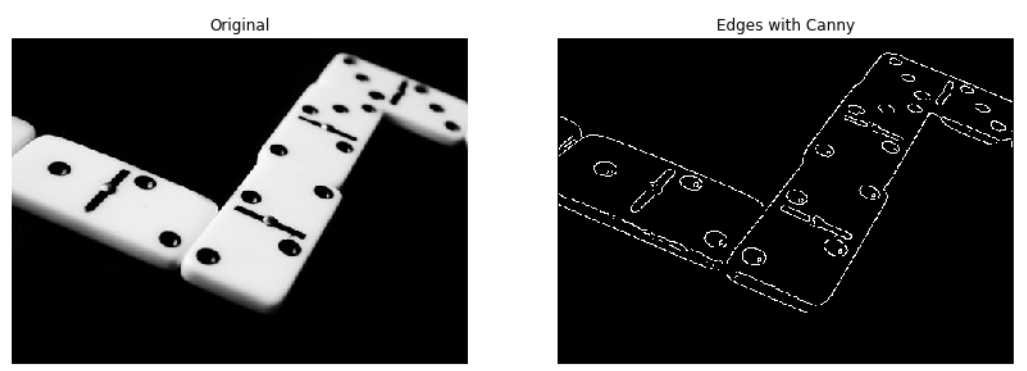

Previously we have seen how to detect edges using the Sobel filtering technique. Now, we'll discuss about one of the most used edge detection techniques, the Canny edge detection. This is widely considered to be the standard edge detection method in image processing. And produces higher accuracy detecting edges and less execution time compared with Sobel algorithm.

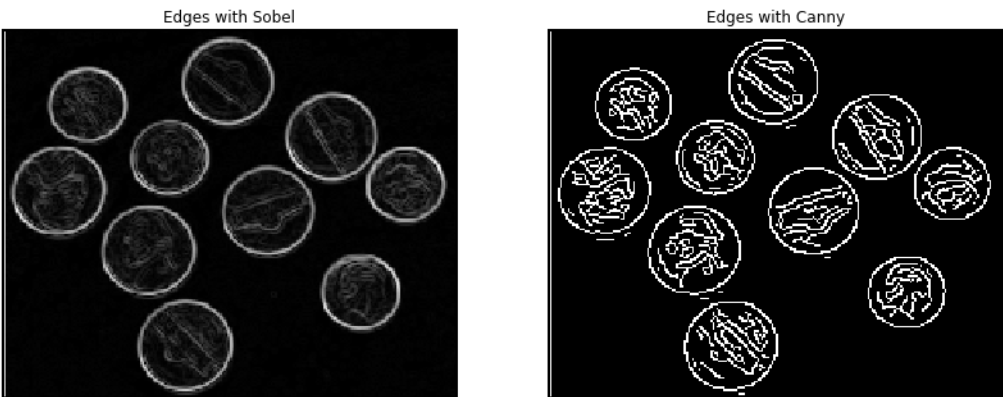

The detector can be applied with the canny function from the feature module of scikit-image. This function requires the image to be a 2-dimensional array, meaning, a grayscale image. So in this example, we convert the image from RGB-3 to grayscale, using the rgb2gray method from the color module that we already know from previous chapters. 

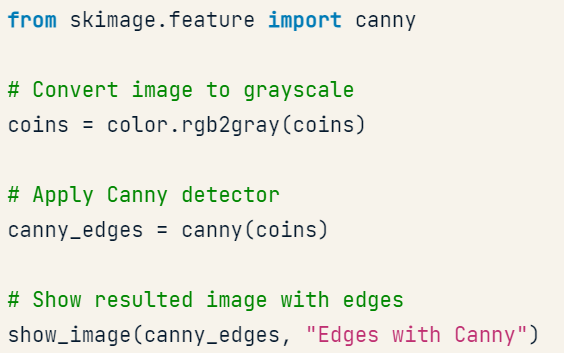

Then we apply the canny detector on the coin's image and obtain the resulting image. Let's show it and see what it looks like.

We see how the edges are highlighted with thick white lines and that some details are more pronounced than the rest of the image. We can also spot the boundaries and shapes of coins; by knowing that for each closed circle or ellipse, there's a coin.

The first step of this algorithm is to apply a gaussian filter in order to remove noise in the image. The same gaussian filter we have seen previously in the course with the gaussian function from the filters module. So, in the canny function you can optionally set the intensity of this Gaussian filter to be applied in the image, by using the sigma attribute. The lower the value of this sigma, the less of gaussian filter effect is applied on the image, so it will spot more edges. On the other hand, if you set a higher value, more noise will be removed and the result is going to be a less edgy image. The default value of this parameter is 1. In this example we set it to 0.5, let's see the effect in the image.

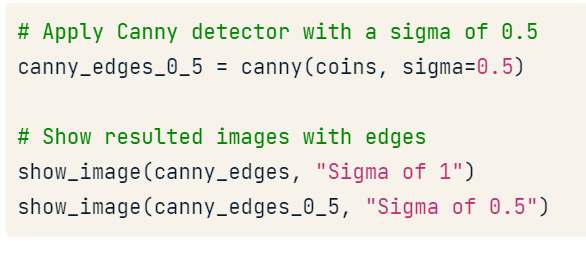

The resulting image has a lot more edges than the previous one and this is because noise was removed before continuing with the rest of the steps in the algorithm.

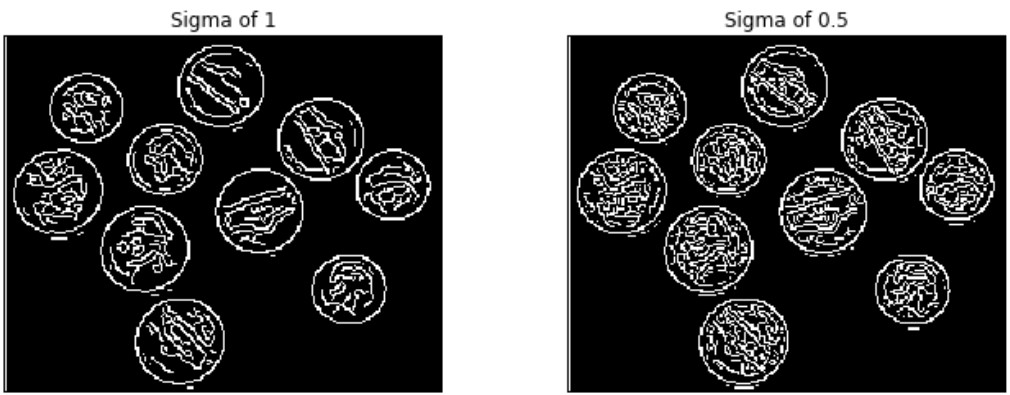

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

### Edges
In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

![dce](images/toronjas.jpg)


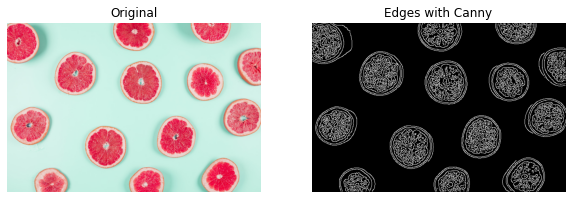

In [3]:
from skimage.feature import canny
from skimage import color

grapefruit = imread('./images/toronjas.jpg')

# Convert image to grayscale
grapefruitb = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruitb)

# Show resulting image
plot_comparison(grapefruit, canny_edges, "Edges with Canny")

### Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with sigma values of the `canny()` function.

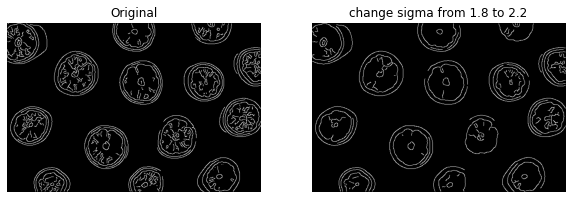

In [4]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruitb, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruitb, sigma=2.2)

# Show resulting image
plot_comparison(edges_1_8, edges_2_2, 'change sigma from 1.8 to 2.2')

The bigger the sigma value, the less edges are detected because of the gaussian filter pre applied.

We'll learn how to detect another feature of an image, the corners. We'll also look at why this is useful in image processing.

Corner detection is an approach used to extract certain types of features and infer the contents of an image. It's frequently used in motion detection, image registration, video tracking, panorama stitching, 3D modelling, and object recognition. 


Features are the points of interest which provide rich image content information. Points of interest are points in the image which are invariant to rotation, translation, intensity, and scale changes. (Basically, robust and reliable). There are different interest points such as corners and edges. So corner detection is basically detecting (one type of) interest points in an image.


In [5]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')

In this exercise, you will detect the corners of a building using the Harris corner detector.

![iage-8](.\images\corners_building_top.jpg)


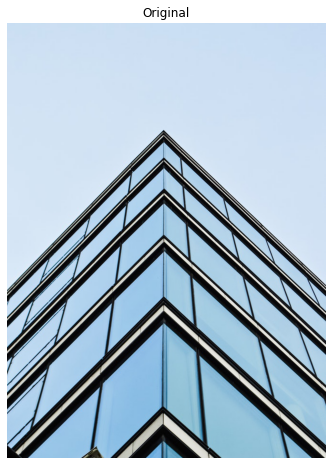

In [7]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('./images/corners_building_top.jpg')

# Convert image from RGB to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')

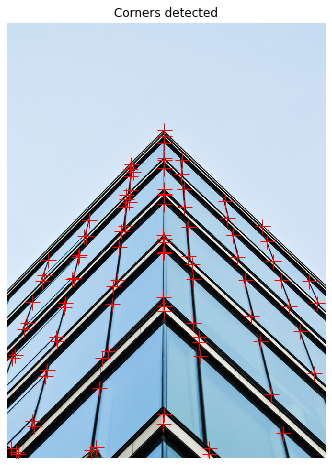

In [8]:
show_image_with_corners(building_image, coords)

### Less corners
In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the `min_distance` attribute parameter of the `corner_peaks()` function.

In [9]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print('With a min_distance set to 40, we detect a total', len(coords_w_min_40), 'corners in the image.')

With a min_distance set to 2, we detect a total 98 corners in the image.
With a min_distance set to 40, we detect a total 36 corners in the image.


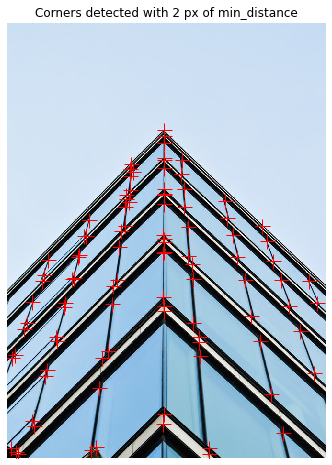

In [10]:
# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")

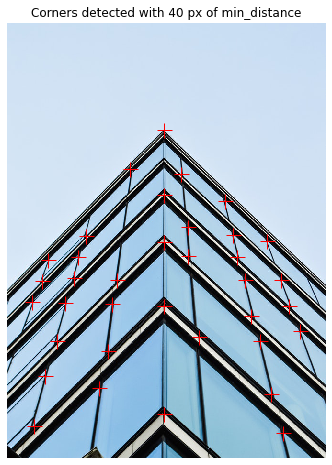

In [11]:
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

In the past couple of years, face detection has attracted a lot of attention and caused a great impact on automated processes through artificial vision. Now we'll learn how to do this yourself using out-of-the-box functions from scikit-image.


Several social networks platforms and smart-phones are using face detection to know if there is someone in a picture and if so, apply filters, add focus in the face area, or recommend you to tag friends. You can even automatically blur faces for privacy protection. Face detection can be useful in other cases as well. Human faces are able to convey many different emotions such as happiness, sadness and many others. That's why face detection is the key first step before recognizing emotions.


With scikit-image, we can detect faces using a machine learning classifier, with just a couple of lines! 

To use the face detector, we import the Cascade class from the feature module. This detection framework needs an xml file, from which the trained data can be read. In this case we'll use frontal face files that are included in the data module of scikit-image. Then initialize the detector, using the Cascade class constructor. Great, we now have the detector ready to be used on images.


To apply the detector on images, we need to use the detect_multi_scale method, from the same cascade class. This method searches for the object, in this case a face. It creates a window that will be moving through the image until it finds something similar to a human face.

Searching happens on multiple scales. The window will have a minimum size, to spot the small or far-away faces. And a maximum size to also find the larger faces in the image.

So this method takes the input image as the first parameter, a scale factor, by which the searching window is multiplied in each step, a step ratio, in which 1 represents an exhaustive search and usually is slow. By setting this parameter to higher values the results will be worse but the computation will be much faster. Usually, values in the interval 1 to 1.5 give good results. Then the minimum and maximum window size are defined. These specify the interval for the search windows that are applied to the input image to detect the faces.

The detector will return the coordinates of the box that contains the face. When printing the result, we see that it's a dictionary, where r represents the row position of the top left corner of the detected window, c is the column position pixel, width is width of detected window, and height, the height of the detected window. We'll use a function that shows the original image with the detected face marked with red lines, forming a box containing the face.



### Is someone there?
In this exercise, you will check whether or not there is a person present in an image taken at night.

![imasge-3](.\images\face_det3.jpg)



In [15]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

In [13]:
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

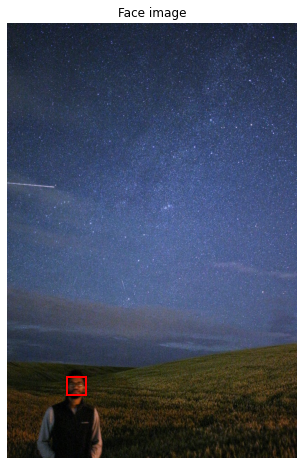

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


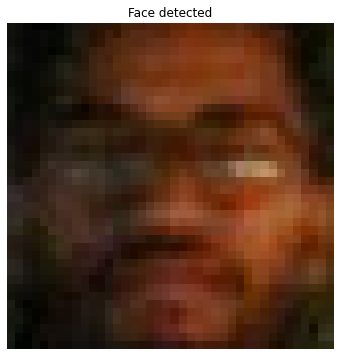

In [14]:
from skimage import data
from skimage.feature import Cascade

night_image = imread('./images/face_det3.jpg')

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

### Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

![imasgse-3](.\images\face_det_friends22.jpg)


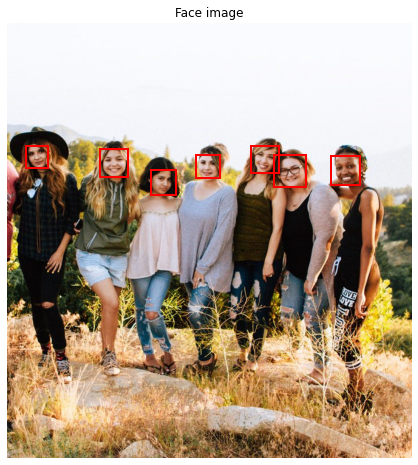

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


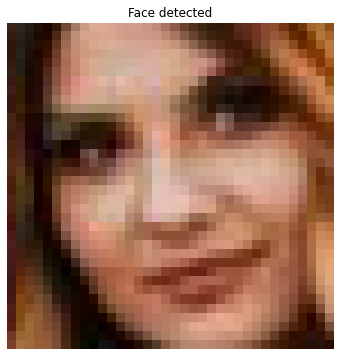

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


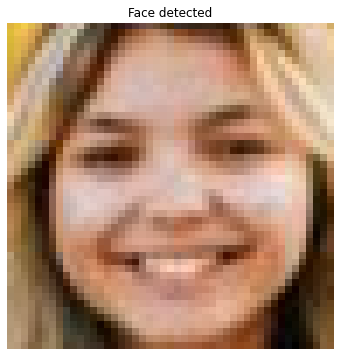

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


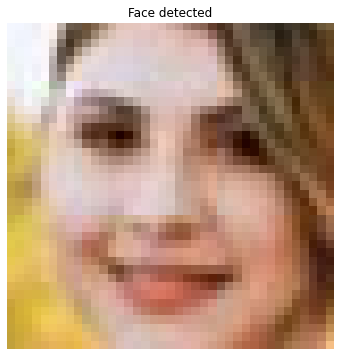

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


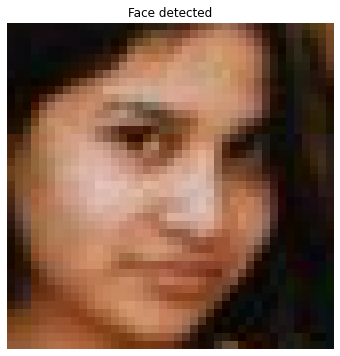

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


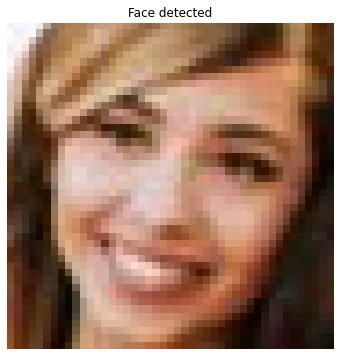

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


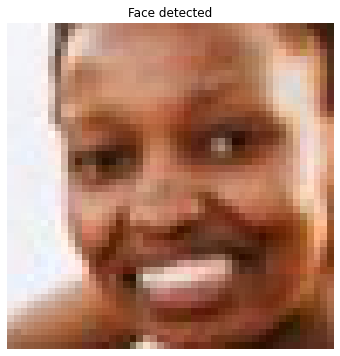

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


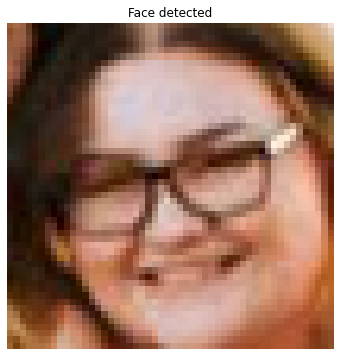

In [16]:
friends_image = imread('./images/face_det_friends22.jpg')

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show detected faces
show_detected_face(friends_image, detected)

### Segmentation and face detection
Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the `slic()` function for segmentation, pre-process the image before passing it to the face detector.

![ismasgse-3](.\images\face_det9.jpg)


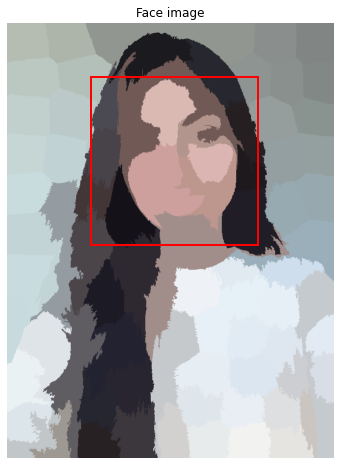

{'r': 110, 'c': 169, 'width': 340, 'height': 340}


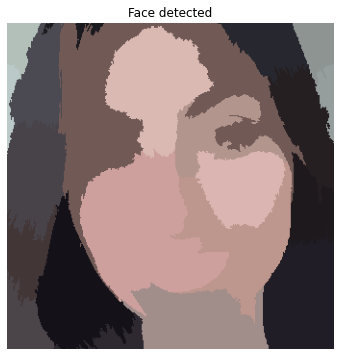

In [19]:
from skimage.segmentation import slic
from skimage.color import label2rgb

profile_image = imread('./images/face_det9.jpg')

# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

In this final part, we'll learn how to apply what we have learned in real-world situations. To do so, we will be combining techniques.

Some cases where we might need to combine several techniques are, for example, converting to images to grayscale before detecting edges or corners. Or, detecting faces to later on blur them by applying a gaussian filter. And even reducing noise and restoring a damaged image.


### Privacy protection
Let's look at a real-world application of what you have learned in the course.

In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.

You can use the gaussian filter for the blurriness.

![image-sas5.png](.\images\face_det25.jpg)



In [20]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= image[ x:width, y:height]
    return face

In [21]:
def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

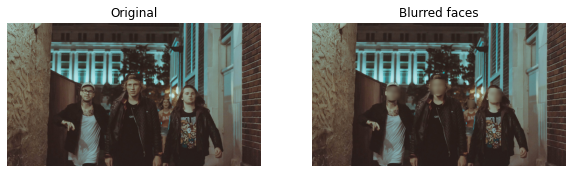

In [22]:
from skimage.filters import gaussian

group_image = imread('images/face_det25.jpg')
group_image_o = group_image.copy()

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image, d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma=8, preserve_range=True)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)
    
plot_comparison(group_image_o, resulting_image, 'Blurred faces')

### Help Sally restore her graduation photo
You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.

Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.

You will be fixing the problems of this image by:

- Rotating it to be uprightusing `rotate()`
- Applying noise reduction with `denoise_tv_chambolle()`
- Reconstructing the damaged parts with `inpaint_biharmonic()` from the inpaint module.

![image-ssas5.png](.\images\sally_damaged_image.jpg)




In [23]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

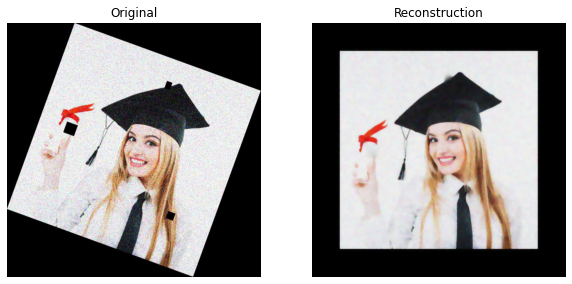

In [24]:
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

damaged_image = imread('./images/sally_damaged_image.jpg')

# Transform the image so it's not rotate
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img, weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

# Show the resulting image
plot_comparison(damaged_image, result, "Reconstruction")